<a href="https://www.w3schools.com">Visit W3Schools.com!</a>

# UMD Budget Analysis

In [162]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import pickle
import plotly.express as px
import numpy as np
import copy

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick
from matplotlib.pyplot import cm

In [163]:
expenses = pd.read_pickle('df/expenses')
revenue = pd.read_pickle('df/revenue')
salary_increases = pd.read_pickle('df/salary_increases')
tuition_fees = pd.read_pickle('df/tuition_fees')
salaries = pd.read_pickle('df/salaries')

In [164]:
data = {
    'tuition_fees' : tuition_fees,
    'expenses' : expenses, 
    'revenue' : revenues, 
    'salary_increases' : salary_increases,
    'salaries' : salaries
}

In [9]:
def plot_line_graphs_tuition(features, title, figsize):
    # plt.style.use('default')
    # plt.style.use('seaborn-bright')
    plt.style.use('seaborn-whitegrid')
    # plt.style.use('seaborn-darkgrid')
    # plt.style.use('classic')
    # figure(num=None, figsize=(20, 12))
    # figure(num=None, figsize=(20, 12), facecolor='w')

    _, ax = fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor='w')
    color=iter(cm.rainbow(np.linspace(0, 1, len(features))))
    for feature in features:
        c = next(color)
        plt.plot(tuition_fees['Year'], tuition_fees[feature], marker='', linewidth=5, alpha=0.9, label=feature, c=c)

    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    ax.tick_params(axis='both', which='major', pad=30)

    plt.title(title, fontsize=70, pad=20)
    plt.xlabel("Year", fontsize=50, labelpad=20)
    plt.ylabel("$ in Dollars", fontsize=50, labelpad=20)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})
    plt.show()

In [10]:
def plot_line_graphs_expenses(features, title, figsize):
    # plt.style.use('default')
    # plt.style.use('seaborn-bright')
    plt.style.use('seaborn-whitegrid')
    # plt.style.use('seaborn-darkgrid')
    # plt.style.use('classic')
    # figure(num=None, figsize=(20, 12))
    # figure(num=None, figsize=(20, 12), facecolor='w')

    _, ax = fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor='w')
    color=iter(cm.rainbow(np.linspace(0, 1, len(features))))
    for feature in features:
        c = next(color)
        plt.plot(sorted(list(expenses['Year'].unique())), features[feature], marker='', linewidth=5, alpha=0.9, label=feature, c=c)

    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    ax.tick_params(axis='both', which='major', pad=30)

    plt.title(title, fontsize=70, pad=20)
    plt.xlabel("Year", fontsize=50, labelpad=20)
    plt.ylabel("$ in Dollars", fontsize=50, labelpad=20)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})
    plt.show()

In [135]:
def plot_line_graphs_revenue(features, title, figsize):
    # plt.style.use('default')
    # plt.style.use('seaborn-bright')
    plt.style.use('seaborn-whitegrid')
    # plt.style.use('seaborn-darkgrid')
    # plt.style.use('classic')
    # figure(num=None, figsize=(20, 12))
    # figure(num=None, figsize=(20, 12), facecolor='w')

    _, ax = fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor='w')
    color=iter(cm.rainbow(np.linspace(0, 1, len(features))))
    for feature in features:
        c = next(color)
        plt.plot(sorted(list(revenue['Year'].unique())), features[feature], marker='', linewidth=5, alpha=0.9, label=feature, c=c)

    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    ax.tick_params(axis='both', which='major', pad=30)

    plt.title(title, fontsize=70, pad=20)
    plt.xlabel("Year", fontsize=50, labelpad=20)
    plt.ylabel("$ in Dollars", fontsize=50, labelpad=20)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})
    plt.show()

# Tuition_fees

In [11]:
tuition_fees

,Year,Standard Tuition Rates: Undergrad Resident,Standard Tuition Rates: Undergrad Non-Resident,Standard Tuition Rates: Undergrad Part-Time Resident (fee per credit hour),Standard Tuition Rates: Undergrad Part-Time Non-Resident (fee per credit hour),Standard Tuition Rates: Graduate Resident (fee per credit hour),Standard Tuition Rates: Graduate Non-Resident (fee per credit hour),Mandatory Fees: Undergrad Full-Time,Mandatory Fees: Undergrad Part-Time,Mandatory Fees: Graduate Full-Time,Mandatory Fees: Graduate Part-Time
0,2010,6566,22503,273,938,471,1016,1487,678,1188,675
1,2011,6763,23178,282,966,500,1077,1653,761,1351,757
2,2012,6966,24337,290,1014,525,1131,1689,779,1383,773
3,2013,7175,25554,299,1065,551,1188,1733,799,1413,788
4,2014,7390,26576,308,1108,573,1236,1771,818,1446,806
5,2015,7764,27905,324,1163,602,1298,1815,840,1490,829
6,2016,8152,29300,340,1221,632,1363,1844,855,1521,846
7,2017,8315,30179,346,1258,651,1404,1866,866,1538,855
8,2018,8481,31688,353,1321,683,1474,1918,893,1590,881
9,2019,8651,33272,360,1387,717,1548,1944,906,1620,898


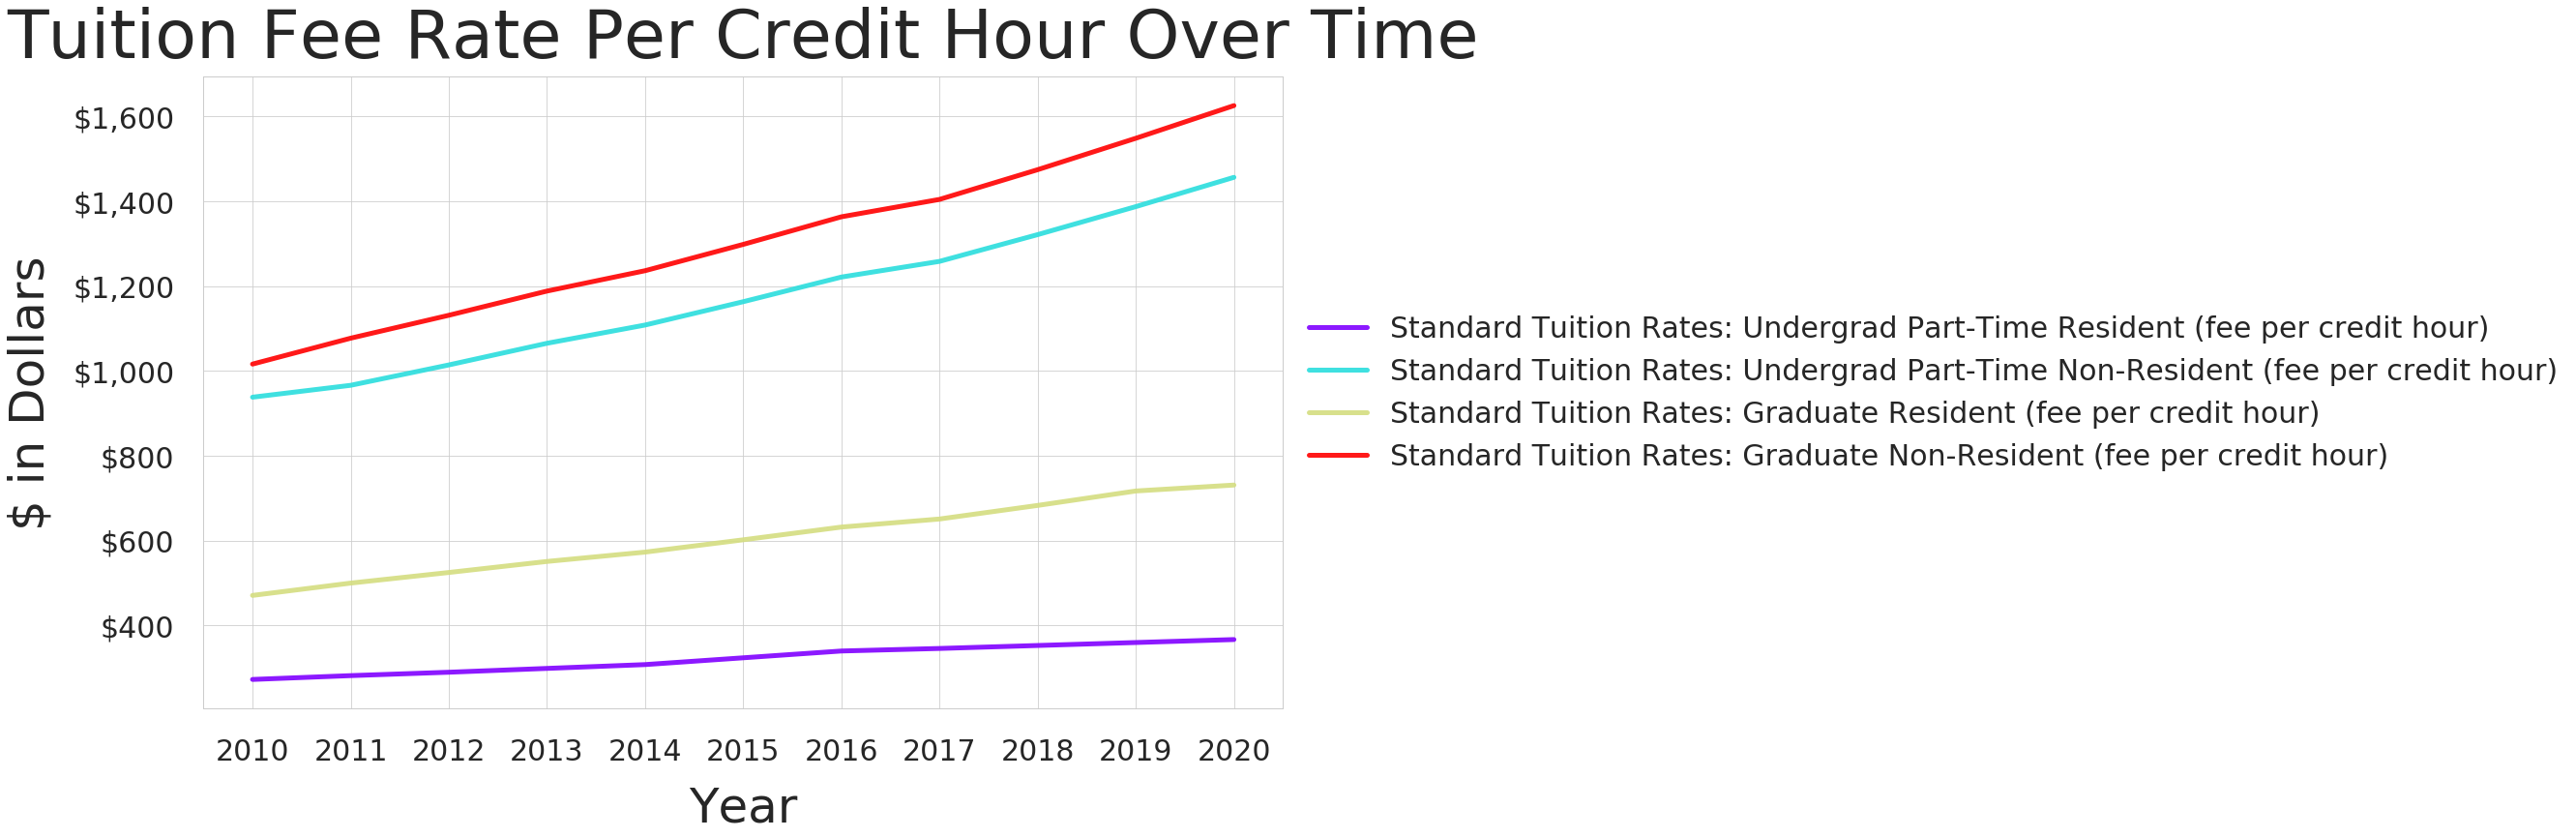

In [13]:
figsize = (20, 12)
title = "Tuition Fee Rate Per Credit Hour Over Time"
features = list(tuition_fees.columns)[3:7]
plot_line_graphs_tuition(features, title, figsize)

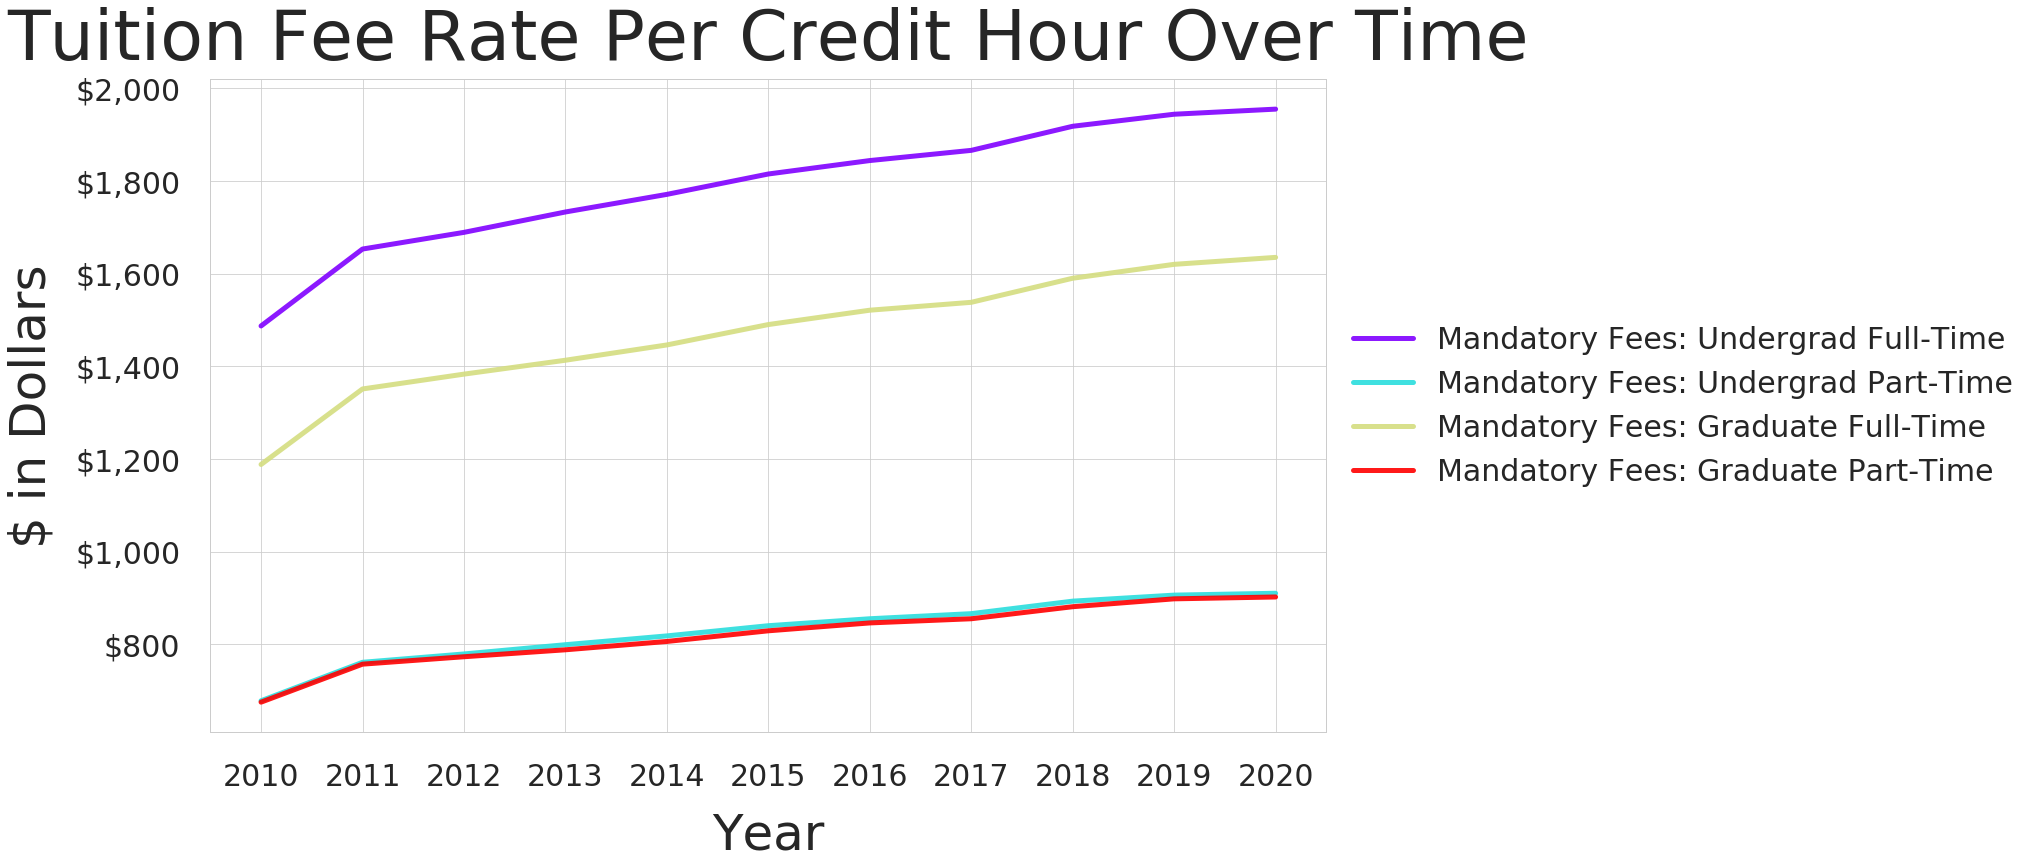

In [16]:
figsize = (20, 12)
title = "Tuition Fee Rate Per Credit Hour Over Time"
features = list(tuition_fees.columns)[7:11]
plot_line_graphs_tuition(features, title, figsize)

# Expenses

In [35]:
expenses

,Year,Group Type,Group,Total Expenditure Amount
0,2020,Program,Research,4.956594e+08
1,2020,Program,Total Expenditures,2.252275e+09
2,2020,Program,Instruction,5.988685e+08
3,2020,Program,Public Service,9.758716e+07
4,2020,Program,Academic Support,2.172755e+08
...,...,...,...,...
157,2012,Category,"Fixed Charges, Debt Service, Rentals & Contracts",2.314603e+08
158,2012,Category,Land & Structures,4.789373e+07
159,2012,Category,Travel & Communication,4.567409e+07
160,2012,Category,Total Expenditures,1.687959e+09


In [45]:
group_list = expenses['Group'].unique()
features_array = []
for feature in group_list:
    features_array.append(expenses.loc[expenses['Group'] == feature].sort_values(by='Year', ascending=True)['Total Expenditure Amount'].values)

In [111]:
orig_features = dict(zip(group_list, features_array))
features = copy.deepcopy(orig_features)
del features['Total Expenditures']

In [112]:
total_expenditures = expenses.loc[(expenses['Group Type'] == 'Category') & (expenses['Group'] == 'Total Expenditures')].sort_values(by='Year', ascending=True)['Total Expenditure Amount'].values

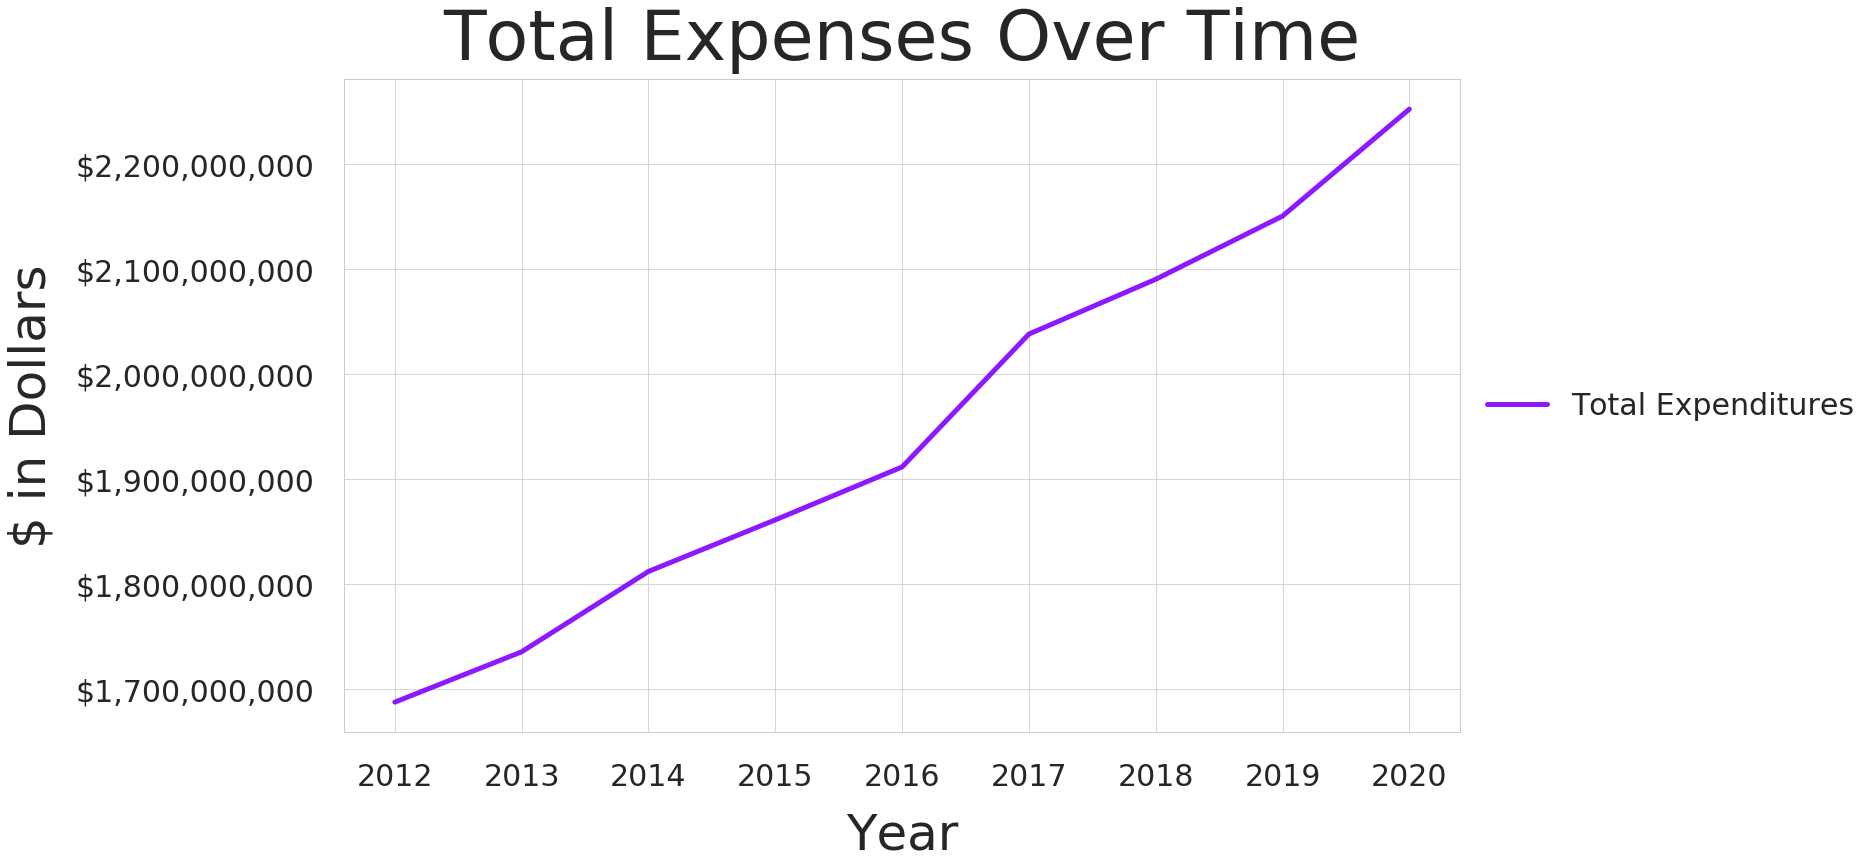

In [113]:
figsize = (20, 12)
title = "Total Expenses Over Time"
plot_line_graphs_expenses({'Total Expenditures' : total_expenditures}, title, figsize)

In [127]:
categories = list(expenses.loc[expenses['Group Type'] == 'Category']['Group'].unique())
del categories[categories.index('Total Expenditures')]

programs = list(expenses.loc[expenses['Group Type'] == 'Program']['Group'].unique())
del programs[programs.index('Total Expenditures')]

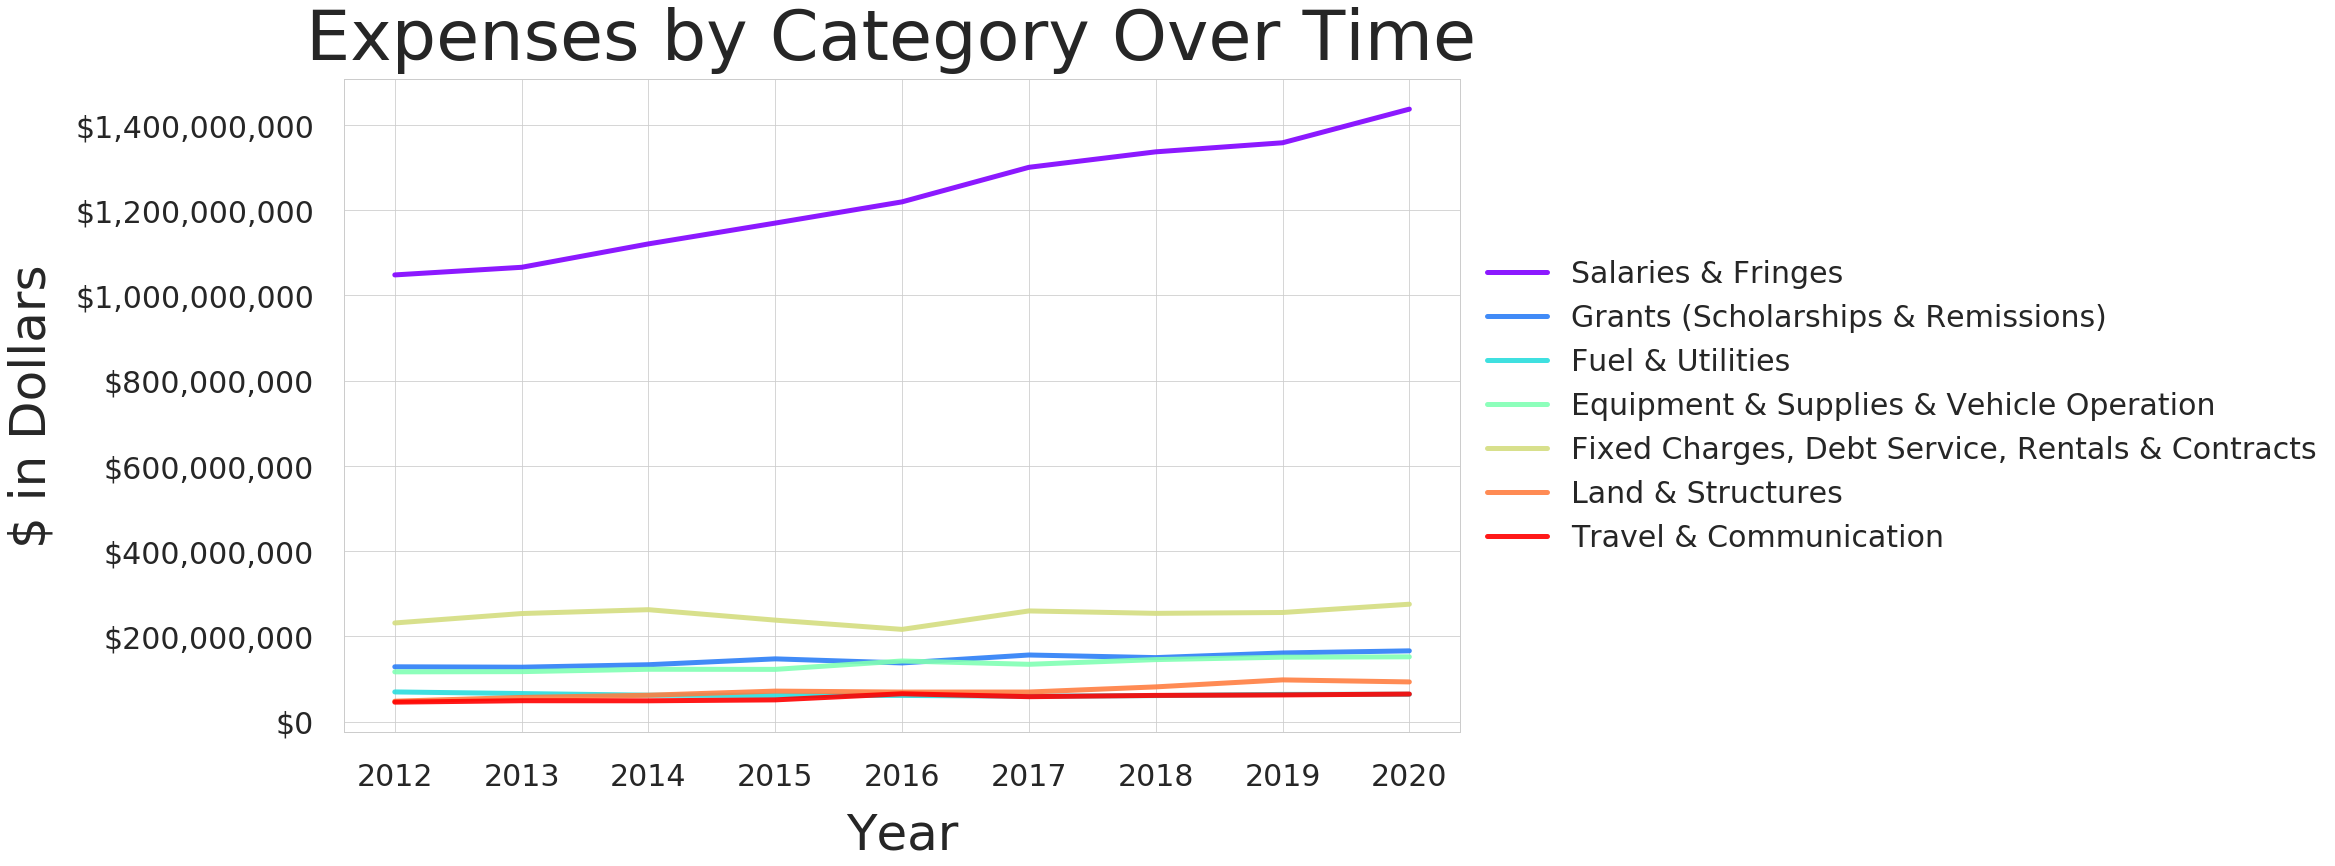

In [128]:
categories_dict = {k:orig_features[k] for k in orig_features if k in categories}

figsize = (20, 12)
title = "Expenses by Category Over Time "
plot_line_graphs_expenses(categories_dict, title, figsize)

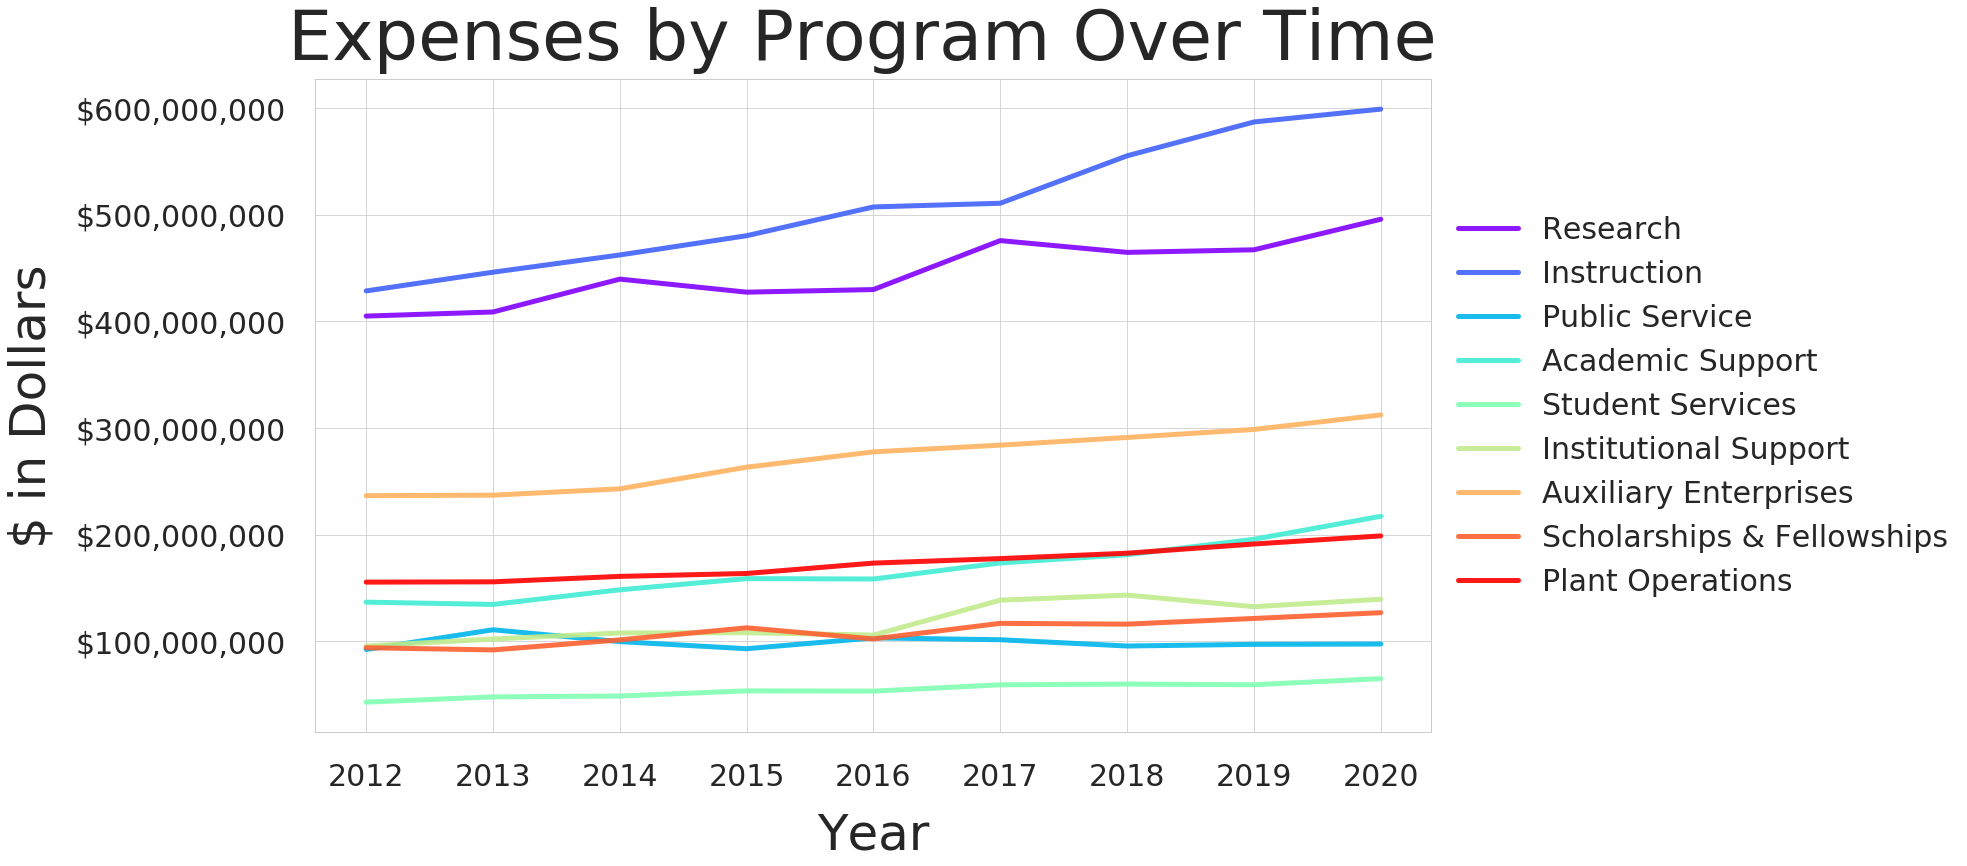

In [129]:
programs_dict = {k:orig_features[k] for k in orig_features if k in programs}

figsize = (20, 12)
title = "Expenses by Program Over Time "
plot_line_graphs_expenses(programs_dict, title, figsize)

# Revenue

In [165]:
revenue

,Year,Restricted Type,Revenue Type,Amount,% of Total
0,2020,Unrestricted,Other Sources,6.084396e+07,2.7
1,2020,Total,Total Operating Budget,2.252275e+09,100.0
2,2020,Restricted,Total Restricted,4.644159e+08,20.6
3,2020,Restricted,State & Local Grants & Contracts,4.725433e+07,2.1
4,2020,Restricted,"Private Gifts, Grants & Contracts",8.740512e+07,3.9
...,...,...,...,...,...
103,2012,Restricted,Federal Grants & Contracts,3.001170e+08,17.8
104,2012,Restricted,State & Local Grants & Contracts,5.954007e+07,3.5
105,2012,Restricted,Total Restricted,4.139779e+08,24.5
106,2012,Total,Total Operating Budget,1.687959e+09,100.0


In [166]:
total_revenue = revenue.loc[revenue['Revenue Type'] == 'Total Operating Budget'].sort_values(by='Year', ascending=True)['Amount'].values

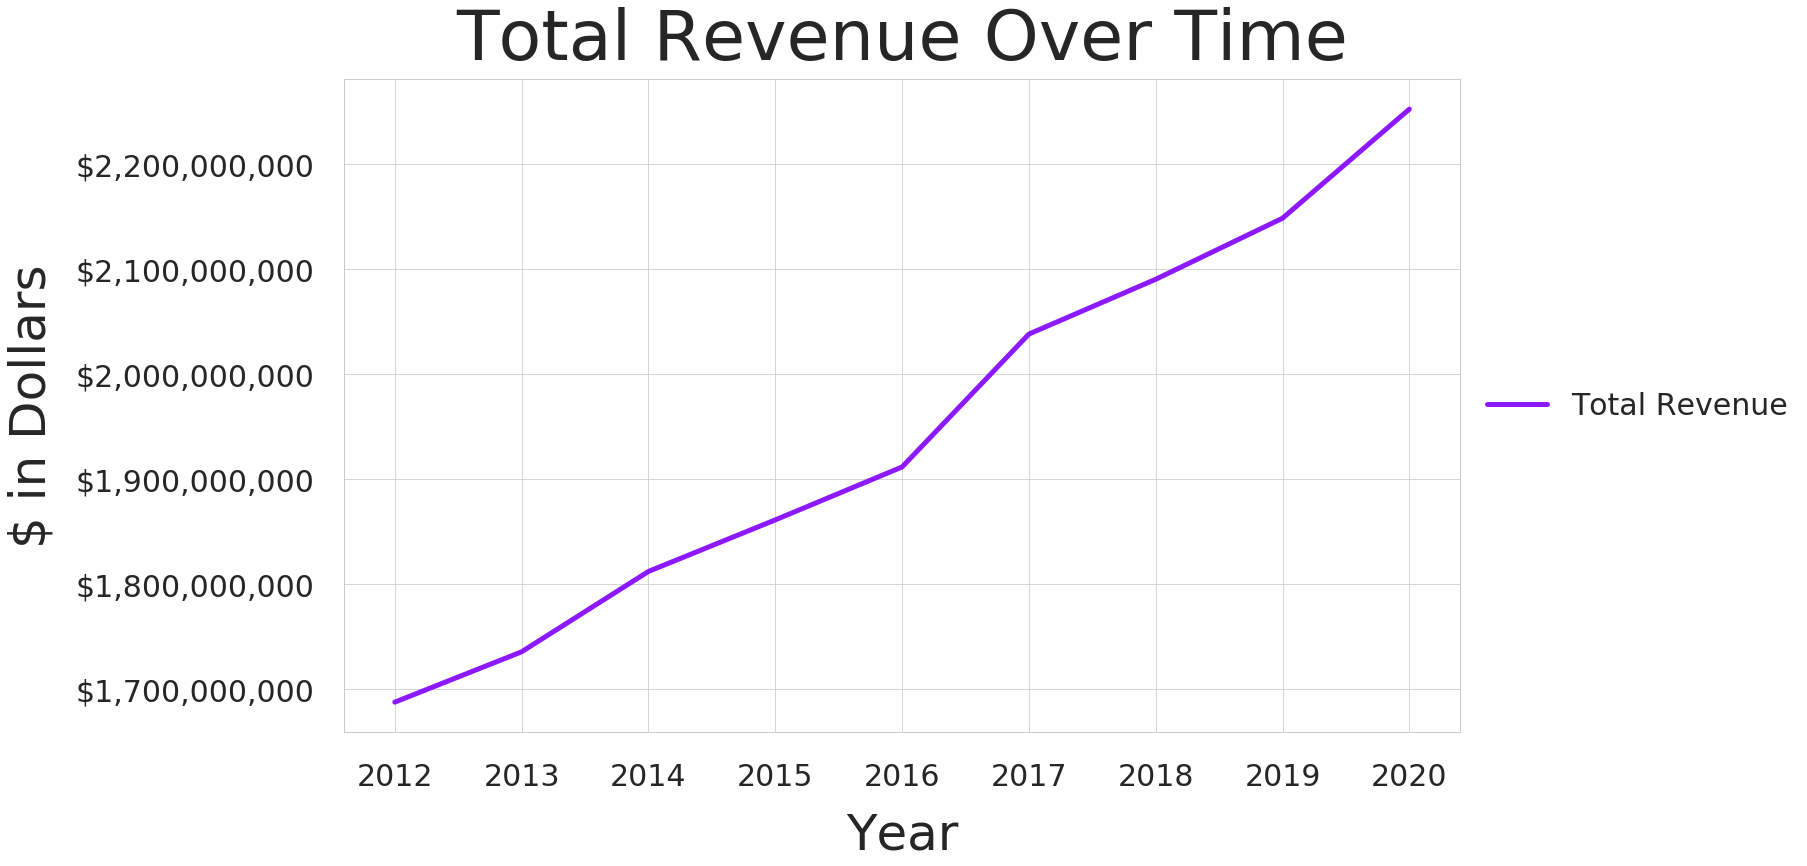

In [167]:
figsize = (20, 12)
title = "Total Revenue Over Time"
plot_line_graphs_expenses({'Total Revenue' : total_revenue}, title, figsize)

In [170]:
unrestricted = list(revenue.loc[revenue['Restricted Type'] == 'Unrestricted']['Revenue Type'].unique())
restricted = list(revenue.loc[revenue['Restricted Type'] == 'Restricted']['Revenue Type'].unique())

In [ ]:
programs_dict = {k:orig_features[k] for k in orig_features if k in programs}

figsize = (20, 12)
title = "Expenses by Program Over Time "
plot_line_graphs_expenses(programs_dict, title, figsize)

In [ ]:
plot_line_graphs_revenue()

# Salary_increases

In [23]:
salary_increases.head()

,Year,State C.O.L.A. %,Merit %,Total Increase %
52,2019,2.5,0.0,2.5
51,2018,0.0,0.0,0.0
50,2017,0.0,2.5,2.5
49,2016,0.0,0.0,0.0
48,2015,2.0,2.5,5.5


# Salaries

In [26]:
salaries.head(10)

,Year,Department,Division,Title,Employee,Salary
0,2013,ENGR-Electrical & Computer Engineering,A. James Clark School of Engineering,Prof,"Abed, Eyad H",216648.00
1,2013,ENGR-Electrical & Computer Engineering,A. James Clark School of Engineering,Assoc Prof,"Abshire, Pamela A.",82872.96
2,2013,ENGR-Institute for Systems Research,A. James Clark School of Engineering,Assoc Prof,"Abshire, Pamela A.",55149.36
3,2013,ENGR-Fischell Department of Bioengineering,A. James Clark School of Engineering,Res Assoc Prof,"Abts, Leigh R",126334.14
4,2013,ENGR-Continuing & Distance Learning in Engr,A. James Clark School of Engineering,Engineer,"Adams, Douglas J",64260.00
5,2013,ENGR-Materials Science & Engineering,A. James Clark School of Engineering,Coordinator,"Adams, Vincent G.",83717.52
6,2013,ENGR-A. James Clark School of Engineering,A. James Clark School of Engineering,Office Assistant,"Addo, Kofi Frimpong",10.20
7,2013,ENGR-Chemical & Biomolecular Engineering,A. James Clark School of Engineering,Prof,"Adomaitis, Raymond A.",91638.84
8,2013,ENGR-Institute for Systems Research,A. James Clark School of Engineering,Prof,"Adomaitis, Raymond A.",54758.70
9,2013,ENGR-Civil & Enviromental Engr,A. James Clark School of Engineering,Prof,"Aggour, Mohamed Sherif",113814.32


In [37]:
avg_df = salaries.groupby(['Year']).mean()
# avg_df.columns = ["Year", "Average Salary"]
avg_df = avg_df.reset_index()

Text(0.5, 1.0, 'Average Salaries at UMD from 2013-2019 (from DBK Data)')

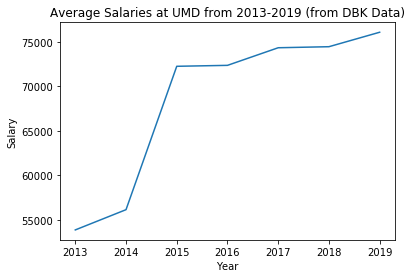

In [38]:
#increase in avg salary

import seaborn as sns

sns.lineplot(x="Year", y="Salary", data=avg_df).set_title("Average Salaries at UMD from 2013-2019 (from DBK Data)")


In [30]:
# We should consider changing this to only show the top 50 departments with highest average salary and show their change
# No real meaning to the graph if we can't understand itbb 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

#deparments with highest avg salary
dept_averages = salaries.groupby(['Year','Department']).mean()
dept_averages = dept_averages.reset_index()

departments = salaries.Department.unique()


fig = px.line(dept_averages, x="Year", y="Salary", color="Department",
              hover_name="Department")

fig.show()

fig = px.scatter(dept_averages, x="Year", y="Salary", size="Salary", color="Department",
           hover_name="Department", log_x=True, size_max=60)

fig.show()
# figure(figsize=[20, 12])

# for i in range(len(departments)):
#     str_dept = departments[i]
#     averages = dept_averages.loc[dept_averages['Department'] == str_dept].sort_values(by='Year', ascending=True)['Salary']
#     years = dept_averages.loc[dept_averages['Department'] == str_dept].sort_values(by='Year', ascending=True)['Year']
# #     print(str_dept)
# #     print(len(averages.values))
# #     print()
#     plt.plot(list(years.values), list(averages.values), linewidth=4, label=str_dept);

# plt.title("Average Salary for Each Department from 2013 - 2019", fontsize=27)
# # plt.xlabel("asd", fontsize=25)
# # plt.ylabel("Number of Crimes", fontsize=25)
# # plt.xticks(fontsize=22)
# # plt.yticks(fontsize=22)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})
# plt.show()


KeyboardInterrupt: 

In [ ]:
# Idea for ML - predict salary based on Title, Department, and Division 